# Validação Cruzada no Prophet

### Primeiramente vamos precisar de um modelo treinado e para isso vamos utilizar a base de vendas on line


In [11]:

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

df= pd.read_csv('online_retail.csv')
display(df)
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']
df

,date,total sales
0,2009-12-01,3106.000000
1,2009-12-02,3254.000000
2,2009-12-03,2951.000000
3,2009-12-04,2529.000000
4,2009-12-05,2644.541758
...,...,...
1099,2012-12-04,2726.403434
1100,2012-12-05,4528.532962
1101,2012-12-06,6125.495419
1102,2012-12-07,3476.642731


,ds,y
0,2009-12-01,3106.000000
1,2009-12-02,3254.000000
2,2009-12-03,2951.000000
3,2009-12-04,2529.000000
4,2009-12-05,2644.541758
...,...,...
1099,2012-12-04,2726.403434
1100,2012-12-05,4528.532962
1101,2012-12-06,6125.495419
1102,2012-12-07,3476.642731


In [12]:
model = Prophet(yearly_seasonality=4)
model.fit(df)

21:12:00 - cmdstanpy - INFO - Chain [1] start processing
21:12:00 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods=365) # previsão para mais 365 dias
future

,ds
0,2009-12-01
1,2009-12-02
2,2009-12-03
3,2009-12-04
4,2009-12-05
...,...
1464,2013-12-04
1465,2013-12-05
1466,2013-12-06
1467,2013-12-07


In [14]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-12-01,1544.088000,2367.294588,3705.804367,1544.088000,1544.088000,1484.265950,1484.265950,1484.265950,149.663047,149.663047,149.663047,1334.602902,1334.602902,1334.602902,0.0,0.0,0.0,3028.353950
1,2009-12-02,1544.448001,2314.037753,3663.096205,1544.448001,1544.448001,1399.572648,1399.572648,1399.572648,90.842106,90.842106,90.842106,1308.730543,1308.730543,1308.730543,0.0,0.0,0.0,2944.020649
2,2009-12-03,1544.808002,2437.881577,3823.409289,1544.808002,1544.808002,1580.156301,1580.156301,1580.156301,299.225909,299.225909,299.225909,1280.930392,1280.930392,1280.930392,0.0,0.0,0.0,3124.964304
3,2009-12-04,1545.168004,1921.629010,3270.386107,1545.168004,1545.168004,1059.546361,1059.546361,1059.546361,-191.713575,-191.713575,-191.713575,1251.259937,1251.259937,1251.259937,0.0,0.0,0.0,2604.714365
4,2009-12-05,1545.528005,1726.067457,3158.269238,1545.528005,1545.528005,905.648210,905.648210,905.648210,-314.133782,-314.133782,-314.133782,1219.781992,1219.781992,1219.781992,0.0,0.0,0.0,2451.176215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,2013-12-04,1895.162421,2530.018427,3880.301221,1889.695345,1900.522585,1342.102042,1342.102042,1342.102042,90.842106,90.842106,90.842106,1251.259937,1251.259937,1251.259937,0.0,0.0,0.0,3237.264463
1465,2013-12-05,1895.384208,2634.211623,4079.628161,1889.893840,1900.764376,1519.007901,1519.007901,1519.007901,299.225909,299.225909,299.225909,1219.781992,1219.781992,1219.781992,0.0,0.0,0.0,3414.392109
1466,2013-12-06,1895.605995,2248.953139,3583.211998,1890.092335,1901.006110,994.850943,994.850943,994.850943,-191.713575,-191.713575,-191.713575,1186.564519,1186.564519,1186.564519,0.0,0.0,0.0,2890.456938
1467,2013-12-07,1895.827782,2071.421283,3442.026643,1890.290829,1901.254503,837.546626,837.546626,837.546626,-314.133782,-314.133782,-314.133782,1151.680408,1151.680408,1151.680408,0.0,0.0,0.0,2733.374408


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


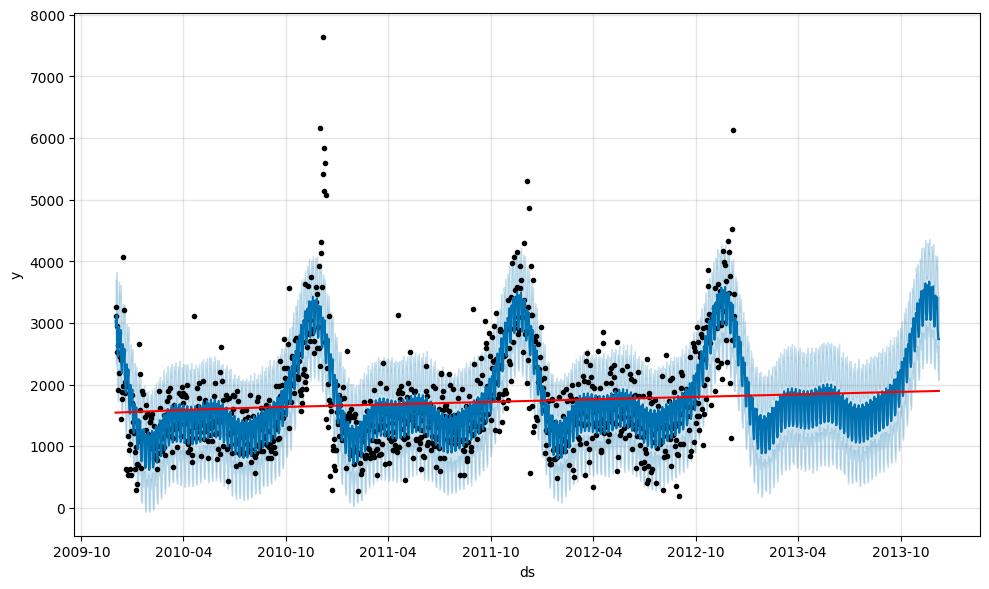

In [15]:

#PLOTANDO A PREVISÃO DO MODELO
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()


In [16]:
# para fazer a validação cruzada, iremos importar a cross_validation

from prophet.diagnostics import cross_validation


- Horizonte => Horizon que é o período de tempo que você deseja avaliar a sua previsão. Mas, neste caso estamos usando o modelo para fazer uma previsão trimestral. 


- Period ou período é a quantidade de tempo entre cada previsão. Ou seja, a cada 30 dias ele realizará uma previsão de 90 dias.

- O initial determina qual é o ponto para o primeiro treinamento da nossa série temporal. Ou seja, passado 730 dias de histórico, ele vai realizar o primeiro teste com o nosso modelo. 




In [18]:
len(df)

1104

In [19]:
# https://raw.githubusercontent.com/marcosmlslira/Facebook-Prophet-Previsoes-de-Series-Temporais-com-Python/main/cross%20validation%20cutoffs.png

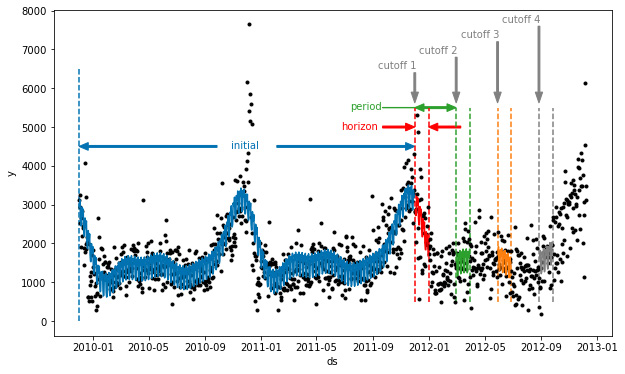




https://github.com/IvanildoBatista/Series-Temporais/blob/master/README.md

In [20]:
print(3*90)

270


In [21]:
# aqui está o modelo treinado => model


df_cv = cross_validation(model,
                        horizon='90 days',
                        period='30 days',
                        initial='730 days')

  0%|          | 0/10 [00:00<?, ?it/s]21:26:16 - cmdstanpy - INFO - Chain [1] start processing
21:26:16 - cmdstanpy - INFO - Chain [1] done processing
21:26:17 - cmdstanpy - INFO - Chain [1] start processing
21:26:17 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 2/10 [00:00<00:00, 12.71it/s]21:26:17 - cmdstanpy - INFO - Chain [1] start processing
21:26:17 - cmdstanpy - INFO - Chain [1] done processing
21:26:17 - cmdstanpy - INFO - Chain [1] start processing
21:26:17 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 4/10 [00:00<00:00, 13.22it/s]21:26:17 - cmdstanpy - INFO - Chain [1] start processing
21:26:17 - cmdstanpy - INFO - Chain [1] done processing
21:26:17 - cmdstanpy - INFO - Chain [1] start processing
21:26:17 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 6/10 [00:00<00:00, 13.70it/s]21:26:17 - cmdstanpy - INFO - Chain [1] start processing
21:26:17 - cmdstanpy - INFO - Chain [1] done processing
21:26:17 - cmdstanpy - INFO - Cha

In [22]:
df.iloc[730]  # Pega a linha na posição 30


ds    2011-12-01 00:00:00
y                  2813.0
Name: 730, dtype: object

In [23]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-12-15,2801.201238,2109.325490,3550.283411,3702.986147,2011-12-14
1,2011-12-16,2352.317418,1621.065177,3079.738122,1229.263629,2011-12-14
2,2011-12-17,2182.372652,1490.981005,2891.159030,1325.415023,2011-12-14
3,2011-12-18,2165.461813,1455.311216,2840.598411,2739.454215,2011-12-14
4,2011-12-19,2636.147930,1919.071175,3372.968335,2699.823386,2011-12-14
...,...,...,...,...,...,...
895,2012-12-04,3107.793379,2440.922360,3779.563049,2726.403434,2012-09-09
896,2012-12-05,3022.980399,2309.882798,3670.163025,4528.532962,2012-09-09
897,2012-12-06,3173.205474,2501.043375,3848.282936,6125.495419,2012-09-09
898,2012-12-07,2672.855566,1990.805753,3360.116714,3476.642731,2012-09-09


In [24]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-12-15,2801.201238,2109.325490,3550.283411,3702.986147,2011-12-14
1,2011-12-16,2352.317418,1621.065177,3079.738122,1229.263629,2011-12-14
2,2011-12-17,2182.372652,1490.981005,2891.159030,1325.415023,2011-12-14
3,2011-12-18,2165.461813,1455.311216,2840.598411,2739.454215,2011-12-14
4,2011-12-19,2636.147930,1919.071175,3372.968335,2699.823386,2011-12-14


# coluna cutoof significa a data que o prophet iniciou uma previsão para o horizonte de 90 dias, que foi o que a gente parametrizou. Para cada data de cutoff, você vai ter um horizonte de 90 dias

In [30]:
# neste caso temos a previsão do primeiro cutoff
df_cv.head(100)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-12-15,2801.201238,2109.325490,3550.283411,3702.986147,2011-12-14
1,2011-12-16,2352.317418,1621.065177,3079.738122,1229.263629,2011-12-14
2,2011-12-17,2182.372652,1490.981005,2891.159030,1325.415023,2011-12-14
3,2011-12-18,2165.461813,1455.311216,2840.598411,2739.454215,2011-12-14
4,2011-12-19,2636.147930,1919.071175,3372.968335,2699.823386,2011-12-14
...,...,...,...,...,...,...
95,2012-01-19,1473.774613,755.977020,2181.121185,1760.481111,2012-01-13
96,2012-01-20,1018.162252,291.020463,1706.208625,943.941079,2012-01-13
97,2012-01-21,903.107575,245.472668,1597.746312,948.781472,2012-01-13
98,2012-01-22,923.915862,204.390117,1662.098484,796.186726,2012-01-13


após um período de 30 dias, se inícia outro cutoff, ou o segundo cutoff, nde vai ralizar a previsão para os próximos 90 dias. E assim, executoamos o Cross-Validation com o Prophet

In [28]:
print(90*6)

540
